In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
airbnb = pd.read_csv(r"C:\Users\lxy_l\OneDrive\Documentos\oasis\AB_NYC_2019.csv")

# Missing Data Handling
- Dealing with missing values, replacing the 'NaN' values with 0

In [4]:
airbnb
airbnb.fillna('0')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0,6,2


In [5]:
airbnb.shape

(48895, 16)

In [6]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
Q1 = airbnb['availability_365'].quantile(0.25)
Q3 = airbnb['availability_365'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = airbnb[(airbnb['price'] < lower_bound) | (airbnb['price'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
299,68974,Unique spacious loft on the Bowery,281229,Alicia,Manhattan,Little Italy,40.71943,-73.99627,Entire home/apt,575,2,191,2019-06-20,1.88,1,298
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,NaN,NaN,3,365
365,103311,2 BR w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73861,-73.95485,Private room,599,3,9,2018-05-19,0.09,28,60
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0


In [10]:
Q1 = airbnb['number_of_reviews'].quantile(0.25)
Q3 = airbnb['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = airbnb[(airbnb['number_of_reviews'] < lower_bound) | (airbnb['price'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
Q1 = airbnb['number_of_reviews'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = airbnb[(airbnb['number_of_reviews'] < lower_bound) | (airbnb['number_of_reviews'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
113,26785,Park Slope Green Guest House,42273,Dani,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,467,2018-12-30,4.22,2,192
225,58059,PRIVATE Room on Historic Sugar Hill,277379,Agnes,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,458,2019-07-03,4.58,2,258
257,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,Astoria,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
1103,467634,yahmanscrashpads,2321321,Lloyd,Queens,Jamaica,40.67747,-73.76493,Shared room,39,1,454,2019-06-18,5.27,1,353


In [12]:
variable = 'number_of_reviews'

mean = airbnb[variable].mean()
std_dev = airbnb[variable].std()

airbnb['z_score'] = (airbnb[variable] - mean) / std_dev

threshold = 3

airbnb['is_outlier'] = airbnb['z_score'].abs() > threshold

outliers = airbnb[airbnb['is_outlier']]
print(outliers)

             id                                            name    host_id  \
3          3831                 Cozy Entire Floor of Brownstone       4869   
7          5178                Large Furnished Room Near B'way        8967   
9          5238              Cute & Cozy Lower East Side 1 bdrm       7549   
11         5441                 Central Manhattan/near Broadway       7989   
12         5803  Lovely Room 1, Garden, Best Area, Legal rental       9744   
...         ...                                             ...        ...   
28370  22035333         *Memory foam mattress lovers//Netflix!!  146449899   
28651  22176831   JFK 2 Comfort 5 Mins from JFK Private Bedroom  156684502   
28801  22241573                Private Room B In Prime Location  162427870   
29280  22463977     Amazing Master Bedroom in Historic Brooklyn  164650025   
29628  22750161   JFK 3 Comfort 5 Mins from JFK Private Bedroom  156684502   

         host_name neighbourhood_group        neighbourhood  la

## The data have some problems with missing and duplicate values

In [13]:
airbnb.isnull().sum()*100/airbnb.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
z_score                            0.000000
is_outlier                         0.000000
dtype: float64

## Removing the duplicates and unnecessary data

In [14]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [15]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
z_score                               0
is_outlier                            0
dtype: int64

In [16]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [17]:
airbnb.fillna('0')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,z_score,is_outlier
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,-0.320410,False
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.487660,False
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365,-0.522428,False
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5.538099,True
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0,-0.320410,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9,-0.522428,False
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36,-0.522428,False
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27,-0.522428,False
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2,-0.522428,False


In [18]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,z_score
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,4.889500e+04
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,1.860098e-17
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,1.000000e+00
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,-5.224279e-01
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,-4.999815e-01
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,-4.101959e-01
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.628563e-02
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.359636e+01


In [19]:
airbnb.head(10)
airbnb.fillna('0')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,z_score,is_outlier
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,-0.320410,False
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.487660,False
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365,-0.522428,False
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5.538099,True
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0,-0.320410,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9,-0.522428,False
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36,-0.522428,False
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27,-0.522428,False
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2,-0.522428,False


## Data Correlation

<Axes: >

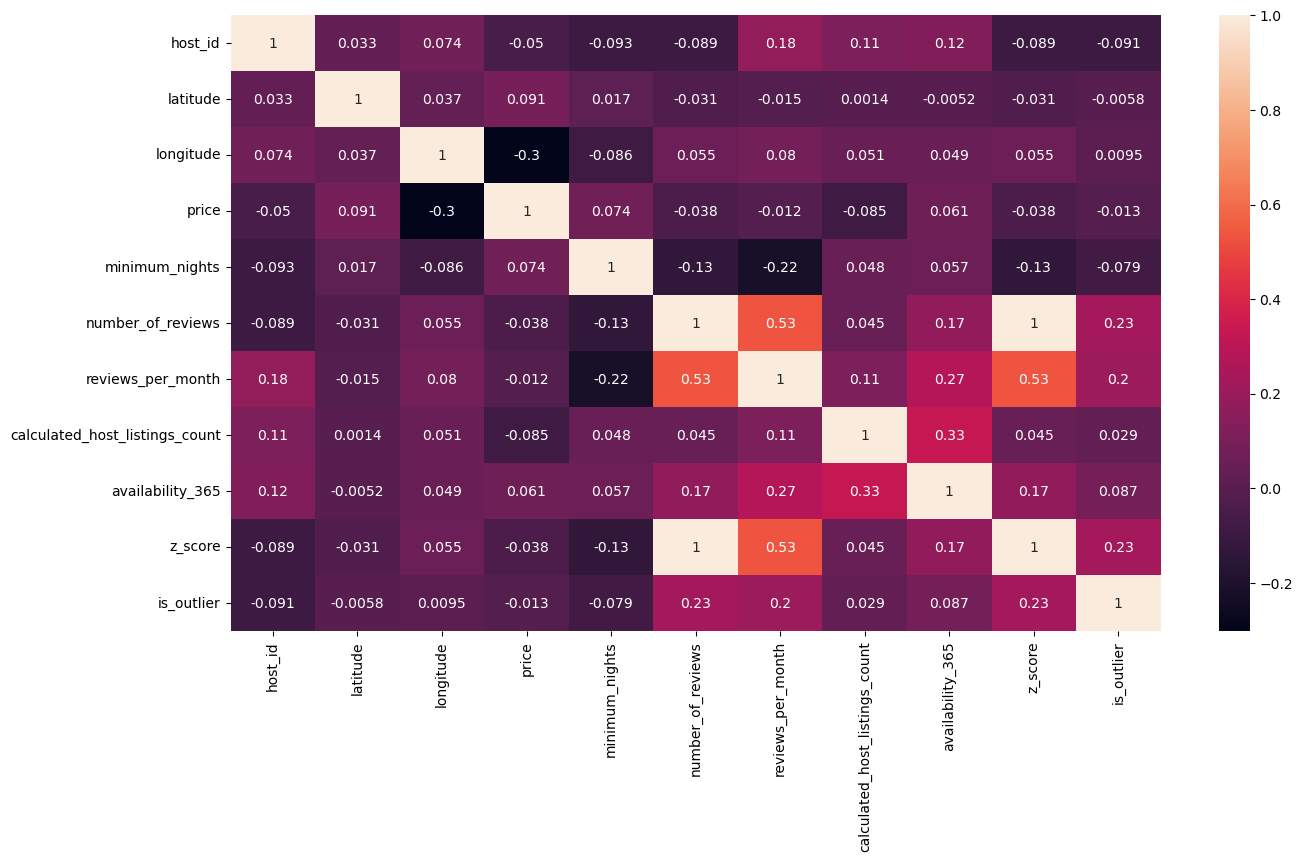

In [20]:
corr = airbnb.corr('kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Neighbourhood Correlations

In [21]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [22]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'z_score',
       'is_outlier'],
      dtype='object')

<Axes: xlabel='price', ylabel='neighbourhood_group'>

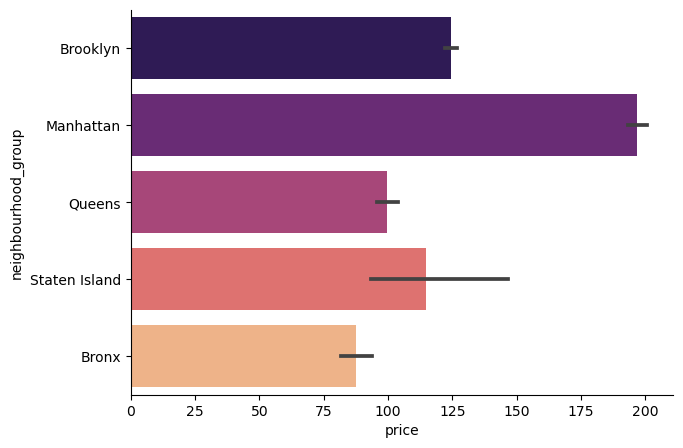

In [23]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='price', y='neighbourhood_group', data=airbnb, palette='magma', orient='h')

Text(0.5, 1.0, 'Room Types Distribution')

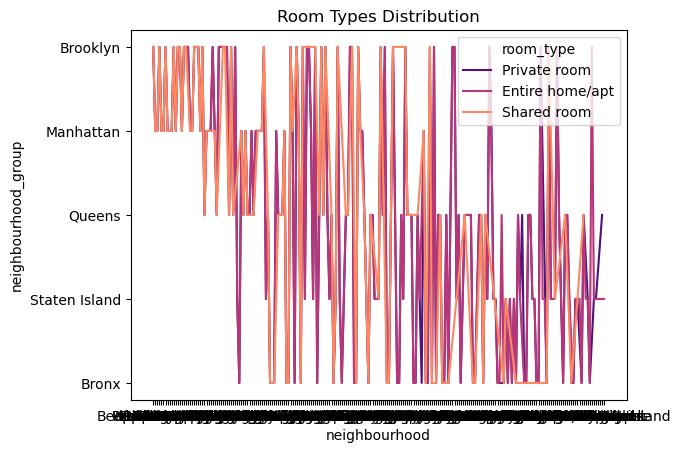

In [24]:
sns.lineplot(x='neighbourhood', y='neighbourhood_group', data=airbnb, hue='room_type', palette='magma')
plt.title('Room Types Distribution')

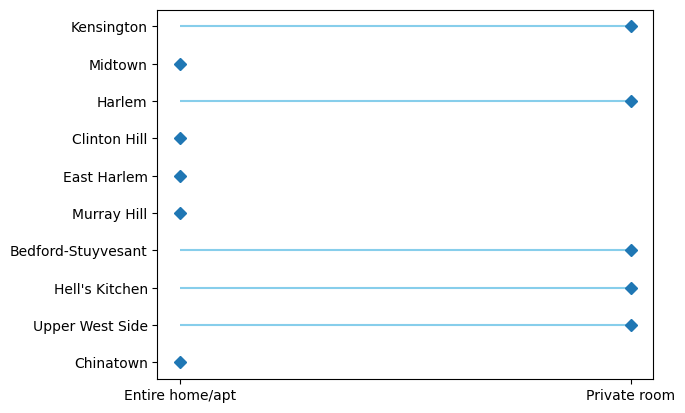

In [25]:
plt.hlines(y=airbnb['neighbourhood'][:10][::-1], xmin=0, xmax=airbnb['room_type'][:10][::-1], color='skyblue')
plt.plot(airbnb['room_type'][:10][::-1], airbnb['neighbourhood'][:10][::-1], 'D')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='neighbourhood', ylabel='room_type'>

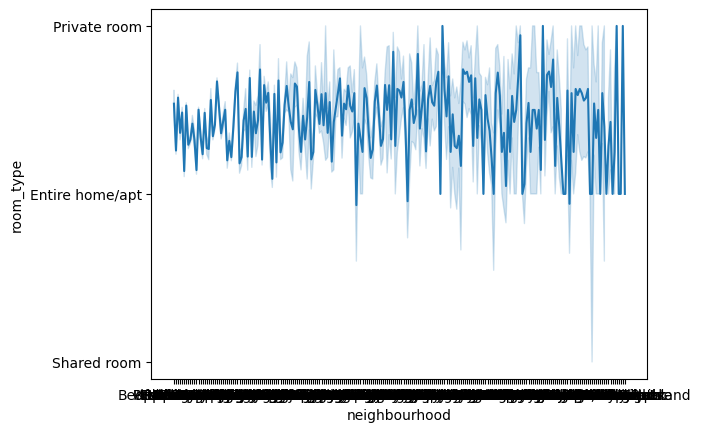

In [26]:
sns.lineplot(x='neighbourhood', y='room_type', data=airbnb, palette='magma')

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

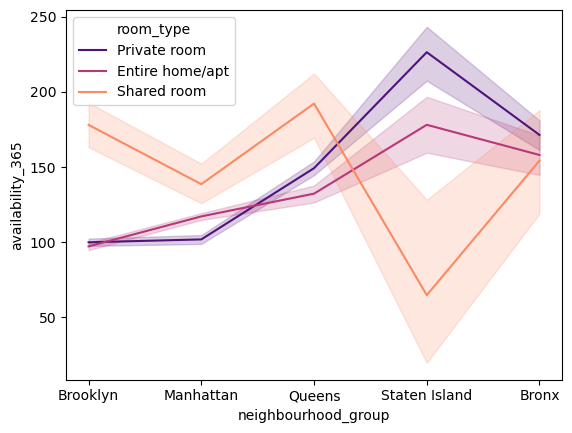

In [27]:
sns.lineplot(x='neighbourhood_group', y='availability_365', data=airbnb, hue='room_type', palette='magma')

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

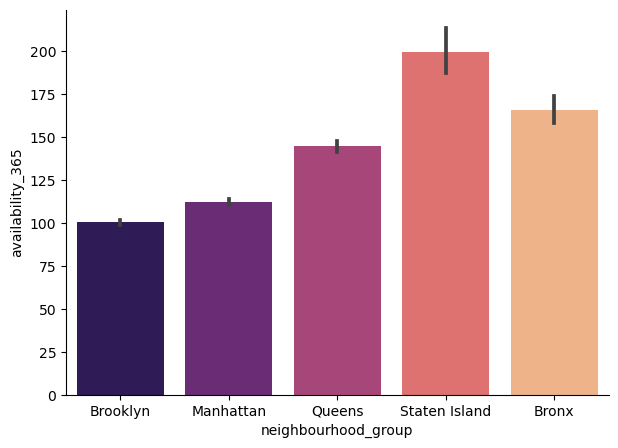

In [28]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='neighbourhood_group', y='availability_365', data=airbnb, palette='magma', orient='v')

In [29]:
pip install folium

  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
  Attempting uninstall: branca
    Found existing installation: branca 0.3.1
    Uninstalling branca-0.3.1:
      Successfully uninstalled branca-0.3.1
Note: you may need to restart the kernel to use updated packages.


In [30]:
import folium

In [31]:
pip install streamlit-folium

Note: you may need to restart the kernel to use updated packages.


In [32]:
import streamlit as st

STREAMLIT_STATIC_PATH = "https://github.com/LuksPcabral/OIBSIP/blob/main/TaskCleaning_Airbnb.ipynb"

map_path = STREAMLIT_STATIC_PATH + 'map.html'

In [33]:
pip install branca==0.6.0


  Obtaining dependency information for branca==0.6.0 from https://files.pythonhosted.org/packages/a6/18/cea6374623d82efc292996997cee0a13ae99359c7e66db22f92dc8484dd1/branca-0.6.0-py3-none-any.whl.metadata
  Using cached branca-0.6.0-py3-none-any.whl.metadata (1.5 kB)
Using cached branca-0.6.0-py3-none-any.whl (24 kB)
  Attempting uninstall: branca
    Found existing installation: branca 0.7.2
    Uninstalling branca-0.7.2:
      Successfully uninstalled branca-0.7.2


# TOP 3 MOST EXPENSIVE

## Manhattan - Upper West Side, Lincoln Center

In [34]:
m = folium.Map(location=[40.77213,	-73.98665], zoom_start = 18, tiles= 'OpenStreetMap')
folium.Marker(location=[40.77213,	-73.98665]).add_to(m)
m._repr_html_()
m

## Brooklyn - Greenpoint, Stunning Manhattan views


In [35]:
m = folium.Map(location=[40.7326,	-73.95739], zoom_start = 18, tiles= 'OpenStreetMap')
folium.Marker(location=[40.7326,	-73.95739]).add_to(m)
m._repr_html_()
m

## Queens - Astoria, Astoria Residential Apartment 

In [36]:
m = folium.Map(location=[40.7681,	-73.91651], zoom_start = 18, tiles= 'OpenStreetMap')
folium.Marker(location=[40.7681,	-73.91651]).add_to(m)
m._repr_html_()
m

# TOP 3 MOST REVIEWS

# Queens, Jamaica

In [37]:
m = folium.Map(location=[40.6673,	-73.76831], zoom_start = 15, tiles= 'OpenStreetMap')
folium.Marker(location=[40.6673,	-73.76831]).add_to(m)
m._repr_html_()
m

# Manhattan,	Harlem

In [38]:
m = folium.Map(location=[40.82085,	-73.94025], zoom_start = 15, tiles= 'OpenStreetMap')
folium.Marker(location=[40.82085,	-73.94025]).add_to(m)
m._repr_html_()
m

# Manhattan,	Harlem

In [39]:
m = folium.Map(location=[40.82124,	-73.93838], zoom_start = 15, tiles= 'OpenStreetMap')
folium.Marker(location=[40.82124,	-73.93838]).add_to(m)
m

# Conclusion

##      In this analysis, was explored various techniques for cleaning data, a critical step in the data preprocessing pipeline. By addressing missing values, handling outliers, and correcting inconsistencies, we ensure that our data is accurate, reliable, and suitable for analysis.

##      Throughout this process, I've gained valuable insights into the importance of data cleaning and learned several techniques to handle common data quality issues. From identifying missing data patterns to implementing outlier detection methods, each step has contributed to improving the integrity and usability of our dataset.

#### To be able to see the maps go to the link: <https://nbviewer.org>

#### Link from github: <https://github.com/LuksPcabral/OIBSIP/blob/main/TaskCleaning_Airbnb.ipynb>